### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [13]:
emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [14]:
colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [15]:
emissoes_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [16]:
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [17]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [18]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [19]:
emissoes_por_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [20]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [21]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [23]:
emissoes_por_ano.groupby('Gás').sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [24]:
emissao_por_gas = emissoes_por_ano.groupby('Gás').sum().sort_values('Emissão', ascending = False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


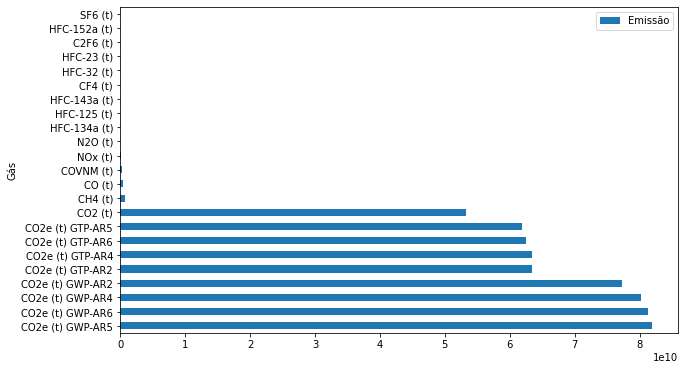

In [25]:
emissao_por_gas.plot(kind = 'barh', figsize = (10,6));

In [26]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [27]:
print(f'A emissão de CO2 corresponde a {float(emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum())*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.
